<a href="https://colab.research.google.com/github/ssondhi2027/pytorch-ml/blob/main/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch

In [54]:
!pip list

Package                                  Version
---------------------------------------- ------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.10.post3
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.3
aiosignal                                1.4.0
aiosqlite                                0.22.1
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.18.4
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                          

In [55]:
import torch.nn as nn
import torch.nn.functional as F

In [56]:
# create a class that inherits aa,modue
class Model(nn.Module):
  # imput layer (4 feature of flower)-->
  #hiden layer1 (number of neurons) -->
  # H2 (n) -->
  # output 3 classes of iris flowers

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

# relu : retified linear unit
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [57]:
#pick a manual seed for randomization
torch.manual_seed(32)
#create an instance of model
model = Model()

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [60]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [61]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-973526484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [62]:
 # train split set x and y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [63]:
# convert these to numpy array
X = X .values
y = y.values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [66]:
# convert x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [67]:
# convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [68]:
# set the criteria of the model to maisure the error , how far off the predictions are
criterion = nn.CrossEntropyLoss()
# choose optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [69]:
# train our model
epochs = 100
looses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  looses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.169895887374878
epoch: 10 loss: 0.9578844308853149
epoch: 20 loss: 0.7988812923431396
epoch: 30 loss: 0.634953498840332
epoch: 40 loss: 0.44043001532554626
epoch: 50 loss: 0.291716992855072
epoch: 60 loss: 0.17829042673110962
epoch: 70 loss: 0.11587586998939514
epoch: 80 loss: 0.08928147703409195
epoch: 90 loss: 0.07743765413761139


Text(0.5, 0, 'epoch')

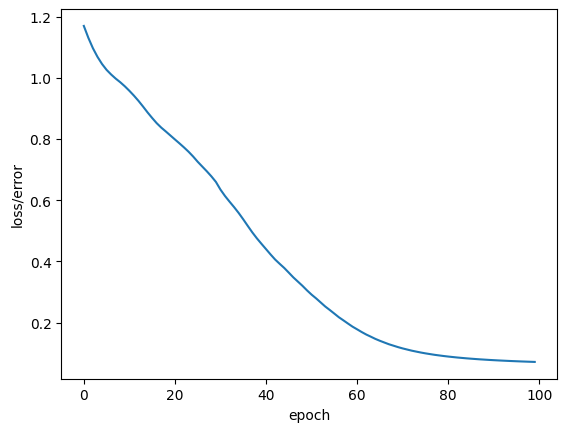

In [70]:
plt.plot(range(epochs), looses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

In [71]:
# evaluate our neural network on test data set (validate model on test set)

with torch.no_grad():# basicaly turn off back propegation
  y_eval = model.forward(X_test) # X_test are features from test set and y_evel will be prediction
  loss = criterion(y_eval, y_test) # find loss or error

print(f'loss: {loss}')

loss: 0.05391683429479599


In [72]:
loss

tensor(0.0539)

In [73]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'
  # this will tell us what type of flower class out network thinks it is
    print(f'{i+1}. {str(y_val)}\t{x} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"we got {correct} correct out of {len(y_test)}")


1. tensor([-3.3580,  3.9452,  0.3616])	versicolor 	 1
2. tensor([  7.5862,   1.1113, -11.3861])	setosa 	 0
3. tensor([  6.6288,   1.5092, -10.4603])	setosa 	 0
4. tensor([-3.3304,  4.2647,  0.0569])	versicolor 	 1
5. tensor([-7.3705,  2.8135,  5.1481])	virginica 	 2
6. tensor([-7.3749,  3.9061,  4.2781])	virginica 	 2
7. tensor([  6.2304,   1.6527, -10.0543])	setosa 	 0
8. tensor([  6.8783,   1.4056, -10.7016])	setosa 	 0
9. tensor([-2.6728,  4.3138, -0.6444])	versicolor 	 1
10. tensor([  7.2201,   1.3890, -11.1494])	setosa 	 0
11. tensor([-3.8269,  4.4110,  0.5165])	versicolor 	 1
12. tensor([-8.6886,  1.9990,  6.9012])	virginica 	 2
13. tensor([-2.0605,  3.8275, -0.7672])	versicolor 	 1
14. tensor([-1.0676,  4.3809, -2.2975])	versicolor 	 1
15. tensor([-7.5000,  2.6230,  5.3318])	virginica 	 2
16. tensor([-8.6214,  1.5491,  7.1280])	virginica 	 2
17. tensor([-3.7724,  3.6503,  0.9422])	versicolor 	 1
18. tensor([-6.7624,  2.7791,  4.5289])	virginica 	 2
19. tensor([-1.6978,  4.2047, 